In [1]:
# https://www.statsmodels.org/dev/example_formulas.html

import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from scipy.stats import linregress 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
matplotlib.style.use('ggplot')
from scipy.spatial import distance 
from sklearn.neighbors import KNeighborsRegressor 
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import statsmodels.graphics as smg
import math
from statsmodels.api import graphics
import seaborn as sns
sns.set(style='ticks', color_codes=True)


# INTRODUCTION TO DATA

1.1) DATAFRAME

In [2]:
data = pd.read_csv('processed2.csv', encoding='utf-8')

In [3]:
data.columns

Index(['Unnamed: 0', 'Gender', 'My position is', 'My working sector is',
       'My working industry is', 'What are your net earnings per year?',
       'How do you feel about privacy policies on applications?',
       'Do you feel you should be compensated for sharing your personal data?',
       'How would you value all your personal data?',
       'How many smartphones/tablets do you personally own?',
       'How many apps have you installed on your smartphone in total?',
       'How many games have you installed on your smartphone?',
       'How many apps have you installed, where you purchase goods?',
       'How many apps have you installed, where you own paid subscriptions?',
       'How many bank’s apps do you have?',
       'How many apps from social networks do you have?',
       'How many installed payment systems do you have?',
       'Where are you from?', 'What kind of smartphone do you use?', 'Age',
       'Gender_norm', 'My position is_norm',
       'What are your net e

In [4]:
data1 = data.copy()
data1.rename(columns={
    'Unnamed: 0': 'id',
    'Gender':'gender',
    'My position is':'position', 
    'My working sector is':'sector', 
    'My working industry is':'industry',
    'What are your net earnings per year?': 'earning_year',
    'Age':'age',
    'How do you feel about privacy policies on applications?':'privacy_feelings',
    'Do you feel you should be compensated for sharing your personal data?':'compensation_share_data',
    'How would you value all your personal data?':'value_pers_data',
    'How many smartphones/tablets do you personally own?_norm':'nr_devices',
    'How many apps have you installed on your smartphone in total?_norm':'tot_install_apps',
    'How many games have you installed on your smartphone?_norm':'nr_install_games',
    'How many apps have you installed, where you purchase goods?_norm':'nr_purchase_goods_apps',
    'How many apps have you installed, where you own paid subscriptions?_norm':'nr_pay_sub_apps',
    'How many bank’s apps do you have?_norm':'nr_banks_apps',
    'How many apps from social networks do you have?_norm':'nr_social_net_apps',
    'How many installed payment systems do you have?_norm':'nr_installed_payment_systems',
    'Where are you from?_norm':'where',
    'What kind of smartphone do you use?':'smartphone_kind',
    'What are your net earnings per year?_norm':'earning_norm',
                    },
            inplace=True)

data1.drop(['Gender_norm',
            'How do you feel about privacy policies on applications?_norm',
            'Do you feel you should be compensated for sharing your personal data?_norm',
            'How would you value all your personal data?_norm',
            'How many smartphones/tablets do you personally own?',
            'How many apps have you installed on your smartphone in total?',
            'How many games have you installed on your smartphone?',
            'How many apps have you installed, where you purchase goods?',
            'How many apps have you installed, where you own paid subscriptions?',
            'How many apps from social networks do you have?',
            'How many bank’s apps do you have?',
            'How many apps from social networks do you have?',
            'How many installed payment systems do you have?',
            'Where are you from?',
            'What kind of smartphone do you use?_norm'],
           axis=1, inplace=True
          )

In [5]:
data1.columns

Index(['id', 'gender', 'position', 'sector', 'industry', 'earning_year',
       'privacy_feelings', 'compensation_share_data', 'value_pers_data',
       'smartphone_kind', 'age', 'My position is_norm', 'earning_norm',
       'nr_devices', 'tot_install_apps', 'nr_install_games',
       'nr_purchase_goods_apps', 'nr_pay_sub_apps', 'nr_banks_apps',
       'nr_social_net_apps', 'nr_installed_payment_systems', 'where'],
      dtype='object')

In [6]:
data1[data1['smartphone_kind'] != data1['smartphone_kind']].head(11)

,id,gender,position,sector,industry,earning_year,privacy_feelings,compensation_share_data,value_pers_data,smartphone_kind,...,earning_norm,nr_devices,tot_install_apps,nr_install_games,nr_purchase_goods_apps,nr_pay_sub_apps,nr_banks_apps,nr_social_net_apps,nr_installed_payment_systems,where
0,0,Male,Individual Contributor,Advertising,Technology,$40000 - $70000,"I’m annoyed of these policies, and check “Agree”;","Mostly yes, depending on the personal data;",Average cost;,NaN,...,2,3,15,0,2,3,1,5,0,NaN
1,1,Female,Student,Marketing,Consumer,< $40000,"I don’t care, I just check “Agree”;","Mostly yes, depending on the personal data;",Average cost;,NaN,...,1,2,22,0,6,0,2,7,1,USA
70,70,Female,Individual Contributor,Healthcare Provider,Healthcare,< $40000,"I don’t care, I just check “Agree”;","Mostly yes, depending on the personal data and...",Average cost;,NaN,...,1,2,30,10,2,0,2,7,0,UK
92,92,Female,Student,Student,Healthcare,< $40000,"I always read it and only agree, when I want to;","Mostly yes, depending on the personal data and...",Low cost;,NaN,...,1,1,63,10,12,0,3,9,1,UK
102,102,Male,Student,Student,Education,< $40000,"I’m annoyed of these policies, and check “Agree”;","Mostly yes, depending on the personal data and...",Expensive;,NaN,...,1,1,12,0,1,0,0,1,0,IRELAND
108,108,Male,Student,Student,Non-profit,< $40000,"I’m annoyed of these policies, and check “Agree”;","Yes, I strongly believe that companies should ...",Expensive;,NaN,...,1,1,107,2,0,0,1,7,1,UK
132,132,Female,Student,Student,Consumer,< $40000,"I don’t care, I just check “Agree”;","Mostly yes, depending on the personal data and...",Low cost;,NaN,...,1,1,71,8,0,0,1,4,1,NETHERLANDS
143,143,Male,Owner,Consulting,Professional Services,< $40000,"I always read it and agree, even if I don’t wa...","Mostly yes, depending on the personal data and...",Expensive;,NaN,...,1,2,9,0,0,0,0,0,0,UK
147,147,Male,Manager,Product Management,Healthcare,$40000 - $70000,"I don’t care, I just check “Agree”;","Mostly yes, depending on the personal data and...",Low cost;,NaN,...,2,1,15,1,2,0,3,1,0,GERMANY
156,156,Female,Individual Contributor,Consulting,Education,$40000 - $70000,"I always read it and only agree, when I want to;","Yes for product marketing, no for non-profit m...",Average cost;,NaN,...,2,1,60,0,8,2,2,4,1,USA


In [7]:
data1.isnull().sum()

id                               0
gender                           0
position                         0
sector                           0
industry                         0
earning_year                     0
privacy_feelings                 0
compensation_share_data          0
value_pers_data                  0
smartphone_kind                 11
age                              1
My position is_norm              1
earning_norm                     0
nr_devices                       0
tot_install_apps                 0
nr_install_games                 0
nr_purchase_goods_apps           0
nr_pay_sub_apps                  0
nr_banks_apps                    0
nr_social_net_apps               0
nr_installed_payment_systems     0
where                            4
dtype: int64

# DATAFRAME AND VARIABLES DESCRIPTION

CATEGORICAL VARIABLES

1.1) gender

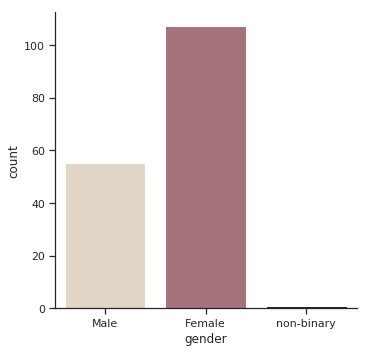

In [8]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=data1)

In [9]:
data1['gender'].value_counts()

Female        107
Male           55
non-binary      1
Name: gender, dtype: int64

It appears from the previous histogram that the Female gender is more represented than the Male gender. Furthermore a small group of non-binary exists in the dataframe.

1.2) position

In [10]:
data1['position'].value_counts()

Student                   116
Individual Contributor     22
Manager                    10
Owner                       8
Intern                      3
Director                    2
C-Level                     1
Vice President              1
Name: position, dtype: int64

Let's create a column of student and no_student

In [11]:
data1['is_student'] = np.nan

data1.loc[(data1['position'] == 'Student'), 'is_student'] = 'student'
data1.loc[(data1['position'] != 'Student'), 'is_student'] = 'no_student'

data1['is_student'].unique()

array(['no_student', 'student'], dtype=object)

As it can be inferred from the istagram the position 'Student' is the highest represented position in the dataframe.
Let's group the positions by paid and unpaid positions.

In [12]:
data1.loc[
    (data1['position'] == 'Intern') | (data1['position'] == 'Student'),
    'position'] = 'unpaid'
data1.loc[
    (data1['position'] == 'Individual Contributor') | (data1['position'] == 'Manager') | (data1['position'] == 'Vice President') |
    (data1['position'] == 'Owner') | (data1['position'] == 'Director') |
    (data1['position'] == 'C-Level'),
    'position'] = 'paid'

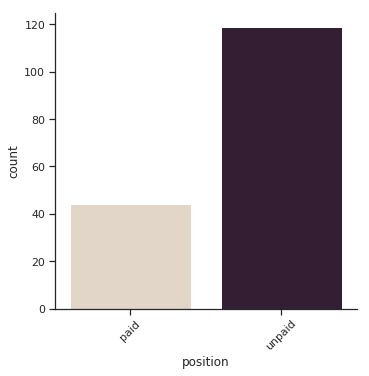

In [13]:
a = sns.catplot(x="position", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=45)

In [14]:
data1['position'].value_counts()

unpaid    119
paid       44
Name: position, dtype: int64

1.3) sector

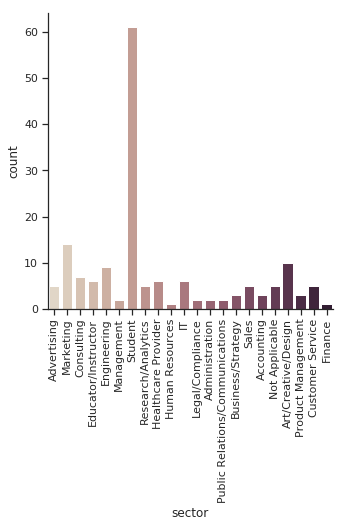

In [15]:
a = sns.catplot(x="sector", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

In [16]:
data1['sector'].value_counts()

Student                            61
Marketing                          14
Art/Creative/Design                10
Engineering                         9
Consulting                          7
Educator/Instructor                 6
Healthcare Provider                 6
IT                                  6
Not Applicable                      5
Sales                               5
Customer Service                    5
Research/Analytics                  5
Advertising                         5
Product Management                  3
Business/Strategy                   3
Accounting                          3
Administration                      2
Public Relations/Communications     2
Management                          2
Legal/Compliance                    2
Finance                             1
Human Resources                     1
Name: sector, dtype: int64

The 'Student' (58 counts) sector has the highest number of counts in the sector variable (representing more the 1/3 of the counts in sector), followed by the 'Marketing', 'Engineering' and 'Art/Creative/Design' sectors, having respectively 13, 9 and 8 counts.

1.4) industry

In [17]:
data1['industry'].value_counts()

Education                52
Consumer                 25
Technology               22
Professional Services    16
Healthcare               15
Finance                  10
Non-profit                7
Government                6
Manufacturing             6
Transport                 2
Materials                 2
Name: industry, dtype: int64

The 'Education' (52 counts) industry has the highest number of counts in the industry variable (representing 1/3 of the counts in industry); this makes sense as the most represented sector in the dataframe is 'Student'. followed by
Other industries well represented are 'Consumer', 'Technology', 'Healthcare', 'Professional Services' and 'Finances' industry, having respectively 24, 21, 15, 13 and 10 counts. 
Let's group similar industries together

In [18]:
data1.loc[
    (data1['industry'] == 'Technology') | 
    (data1['industry'] == 'Materials') |
    (data1['industry'] == 'Manufacturing'), 
    'industry'] = 'Technology' 

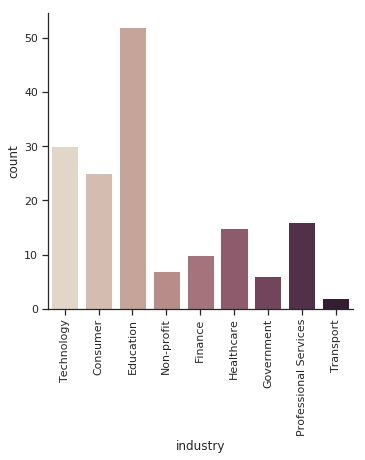

In [19]:
a = sns.catplot(x="industry", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

In [20]:
data1['industry'].value_counts()

Education                52
Technology               30
Consumer                 25
Professional Services    16
Healthcare               15
Finance                  10
Non-profit                7
Government                6
Transport                 2
Name: industry, dtype: int64

1.5) earning_year

In [21]:
data1['earning_year'] = data1['earning_year'].str.replace('$','')

In [22]:
data1['earning_year'].value_counts()

< 40000            125
40000 - 70000       27
70000 - 150000       7
150000 - 400000      2
> 400000             2
Name: earning_year, dtype: int64

The people earning less the 40000 dollars are the people highly represented in the dataframe with 120 counts(4/5 of the all data),
followed by people earning 40000 -70000 dollars (23 counts) and people earning 70000-150000 dollars (7 counts).
A good idea could  be to group the people earning 70000-150000, 150000-400000 and > 400000 dollars (7, 1, a 1 counts respectively) together as they are the less represented.



In [23]:
data1.loc[
    (data1['earning_year'] == '70000 - 150000') | 
    (data1['earning_year'] == '150000 - 400000') |
    (data1['earning_year'] == '> 400000'), 
    'earning_year'] = 'high' 

data1.loc[data1['earning_year'] == '< 40000', 'earning_year'] = 'low'
data1.loc[data1['earning_year'] == '40000 - 70000', 'earning_year'] = 'medium'

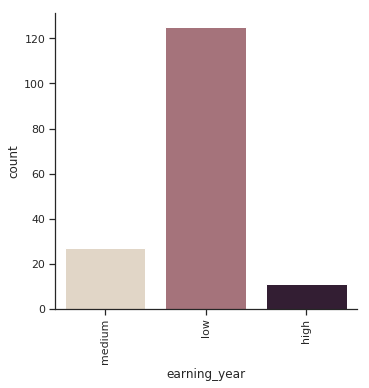

In [24]:
a = sns.catplot(x="earning_year", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

In [25]:
data1['earning_year'].value_counts()

low       125
medium     27
high       11
Name: earning_year, dtype: int64

1.6) age

In [26]:
data1['age'].unique()

array(['28', '23', '40', '29', '21', '25', '32', '22', '24', '39', nan,
       '18', '27', '37', '30', '33', '44', '26', '17', '35', '36', '38',
       '47', '34', '41', 'prefer not to say', '46', '31', '45', '20',
       '53'], dtype=object)

In [27]:
data1['age'].value_counts()

21                   32
22                   28
23                   18
25                   13
28                    9
29                    6
26                    6
24                    4
32                    4
18                    4
44                    3
30                    3
40                    3
35                    3
36                    3
27                    3
39                    3
41                    2
33                    2
38                    2
17                    2
prefer not to say     1
34                    1
47                    1
37                    1
45                    1
46                    1
53                    1
31                    1
20                    1
Name: age, dtype: int64

In [28]:
data1['age'].isnull().value_counts()

False    162
True       1
Name: age, dtype: int64

As it can be noticed a string 'prefer not to say' (1 count) and nan value (1 count) are present in the column 'age'. Let's replace them with the median value of the column.


In [29]:
data1.replace('prefer not to say', np.nan, inplace=True)
data1['age'].fillna((data1['age'].median()), inplace=True)

A good idea could be to divide the people in group by age as follows:
    - 17-21
    - 22-25
    - 26-30
    - 31-35
    - 36-40
    - > 40


In [30]:
#age group function

def gen(x):
    if (x < 22):
        return '17-21'
    if (x >= 22) & (x < 26):
        return '22-25'
    if (x >= 26) & (x < 31):
        return '26-30'
    if (x >= 31) & (x < 36):
        return '31-35'
    if (x >= 36) & (x < 41):
        return '36-40'
    if (x >= 41):
        return '41-47'
    
data1['age_group'] = data1['age'].astype(float).apply(gen)


In [31]:
data1['age_group'].value_counts().sort_index()

17-21    39
22-25    65
26-30    27
31-35    11
36-40    12
41-47     9
Name: age_group, dtype: int64

In [32]:
data1['age_group'].isnull().sum()

0

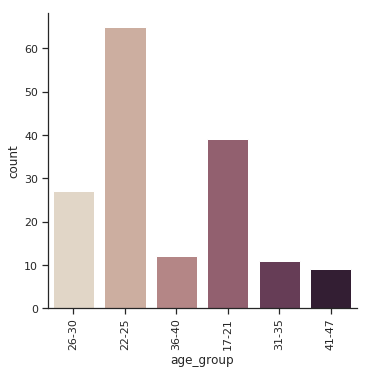

In [33]:
a = sns.catplot(x="age_group", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

The people in the age_range 22-25 have the highest counts (63), followed by the 17-21 age_group (38 counts) and 26-30 age_group (23 counts). It makes sense as the manjority of individuals in the dataframe are students.

1.7) privacy_feelings

In [34]:
data1['privacy_feelings'].value_counts()

I don’t care, I just check “Agree”;                                              76
I’m annoyed of these policies, and check “Agree”;                                40
I always read it and agree, even if I don’t want to, but need to use the app;    24
I always read it and only agree, when I want to;                                 14
I don't always read. They are usually too long.                                   1
I decline them when I can                                                         1
free/libre open source applications, thank you                                    1
Never read it, still care but not enough to not use the app                       1
I don't read them, but I'm generally aware of what they are about                 1
What policies?                                                                    1
If I need it I agree, if I don't need it I read some.                             1
I usually agree, but am leary with some                                     

Let's group the answer with counts equals to one all together as they are low represented in the dataframe.

In [35]:
def privacy(x):
    if (x == 'I don’t care, I just check “Agree”;'):
        return 'nocare_agree'
    if (x == 'I’m annoyed of these policies, and check “Agree”;'):
        return 'annoyed_agree'
    if (x == 'I always read it and agree, even if I don’t want to, but need to use the app;'):
        return '(read_agree)_nowant'
    elif (x == 'I always read it and only agree, when I want to;'):
        return '(read_agree)_want'
    else:
        return 'other'

In [36]:
data1['privacy_feelings'] = data1['privacy_feelings'].apply(privacy)
data1['privacy_feelings'].value_counts()

nocare_agree           76
annoyed_agree          40
(read_agree)_nowant    24
(read_agree)_want      14
other                   9
Name: privacy_feelings, dtype: int64

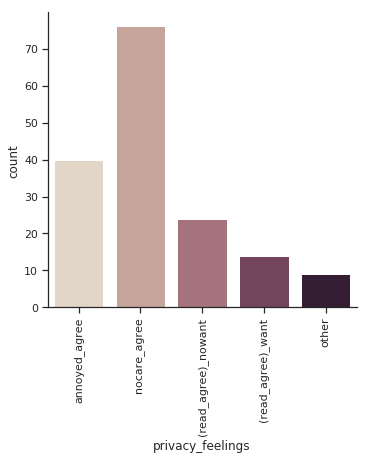

In [37]:
a = sns.catplot(x="privacy_feelings", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

The individuals who don’t care and just check “Agree" are highly represented in the dataframe with 69 counts, followed by
- the individuals annoyed of these policies, and check “Agree” (39 counts), 
- the individuals who always read the policies and agree, even if they don’t want to, but need to use the app (23 counts),
- the individuals who always read the policies and only agree, when they want to (13 counts).
- the remaining individuals answered differently (8 counts).

1.8) compensation_share_data

In [38]:
data1['compensation_share_data'].unique()

array(['Mostly yes, depending on the personal data;',
       'Yes, I strongly believe that companies should pay me for personal data;',
       'No, I don’t want them to get any of my personal data, even if they pay;',
       'Mostly yes, depending on the personal data and goals;',
       'No, I’m fine to give my personal data for free;',
       'You never give your data for free, you get the service in exchange',
       "depends on the data; if i'm basically anonymous then whatever.",
       'Yes for product marketing, no for non-profit marketing'],
      dtype=object)

The similar options of the comp_share_feelings categorical variable could be grouped together:
    - to group 'Mostly yes, depending on the personal data and goals;' with 'Mostly yes, depending on the personal data;' and "depends on the data; if i'm basically anonymous then whatever."
    - to group 'Yes, I strongly believe that companies should pay me for personal data;' with 'You never give your data for free, you get the service in exchange'

In [39]:
def compensation(x):
    if ((x == 'Mostly yes, depending on the personal data and goals;') | (x == 'Mostly yes, depending on the personal data;') | (x == "depends on the data; if i'm basically anonymous then whatever.") | (x == "Yes for product marketing, no for non-profit marketing")):
        return 'depends'
    if ((x == 'Yes, I strongly believe that companies should pay me for personal data;') | (x == 'You never give your data for free, you get the service in exchange')):
        return 'yes_pay'
    if (x == 'No, I don’t want them to get any of my personal data, even if they pay;'):
        return 'never'
    elif (x == 'No, I’m fine to give my personal data for free;'):
        return 'yes_free'
          
data1['compensation_share_data'] = data1['compensation_share_data'].apply(compensation)
data1['compensation_share_data'].value_counts()

depends     108
yes_pay      31
never        14
yes_free     10
Name: compensation_share_data, dtype: int64

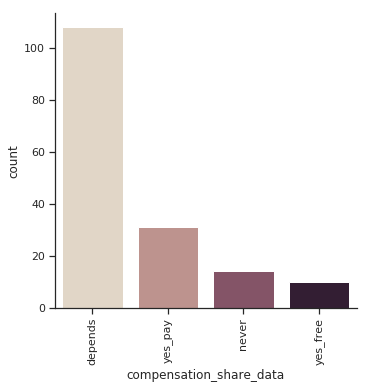

In [40]:
a = sns.catplot(x="compensation_share_data", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

The individuals who mostly want to share the data for free, depending on the personal data, are highly represented in the dataframe with 101 counts, followed by
- the individuals who want to share the data but want compensation (29 counts);
- the individuals who never want to share the data (13 counts);
- the individuals who want to share the data for free (9 counts).

1.9) value_pers_data

In [41]:
data1['value_pers_data'].value_counts()

Average cost;           67
Expensive;              45
Low cost;               25
Extremely expensive;    20
Free;                    6
Name: value_pers_data, dtype: int64

In [42]:
def value_data(x):
    if (x == 'Average cost;'):
        return 'average cost'
    if (x == 'Expensive;'):
        return 'expensive'
    if (x == 'Low cost;'):
        return 'low cost'
    if (x == 'Extremely expensive;'):
        return 'highly expensive'
    elif (x == 'Free;'):
        return 'free'
          
data1['value_pers_data'] = data1['value_pers_data'].apply(value_data)
data1['value_pers_data'].value_counts()

average cost        67
expensive           45
low cost            25
highly expensive    20
free                 6
Name: value_pers_data, dtype: int64

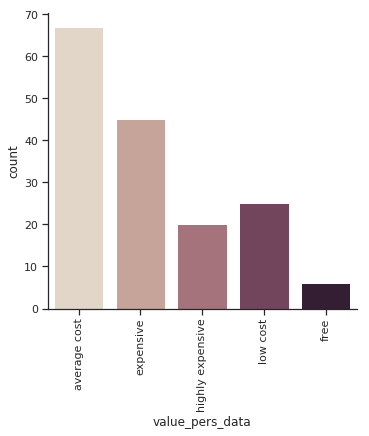

In [43]:
a = sns.catplot(x="value_pers_data", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

The individuals who value their personal data as average cost, are highly represented in the dataframe with 64 counts, followed by
- the individuals who value their personal data as expensive (42 counts);
- the individuals who value their personal data as not expensive (24 counts);
- the individuals who value their personal data as highly expensive (18 counts);
- the individuals who value their prersonal data as free (4 counts).

1.10) where

In [44]:
data1['where'].unique()

array([nan, 'USA', 'UK', 'NETHERLANDS', 'GERMANY', 'GREECE', 'POLAND',
       'SERBIA', 'PORTUGAL', 'NORWAY', 'BELGIUM', 'AUSTRALIA', 'PAKISTAN',
       'ETHIOPIA', 'ASIA', 'LATVIA', 'FRANCE', 'ITALY', 'SWITZERLAND',
       'AUSTRIA', 'IRELAND', 'CANADA', 'SWEDEN', 'TURKEY', 'SCOTLAND',
       'CHINA', 'KAZAKHSTAN', 'ROMANIA'], dtype=object)

Let's group the continental Europe countries together:

In [45]:
def where(x):
    if (x == 'CANADA') or (x == 'USA'):
        return 'USA'
    if (x == 'IRELAND') or (x == 'SCOTLAND') or (x == 'UK'):
        return 'UK'
    elif (x == 'TURKEY') or (x == 'PAKISTAN') or (x == 'KAZAKHSTAN') or (x == 'ETHIOPIA') or (x == 'AUSTRALIA') or (x == 'CHINA') or (pd.isnull(x)):
        return 'OTHER'
    else:
        return 'CONTINENTAL EUROPE' 
    
data1['where'] = data1['where'].apply(where)
data1['where'].value_counts()

UK                    56
USA                   52
CONTINENTAL EUROPE    44
OTHER                 11
Name: where, dtype: int64

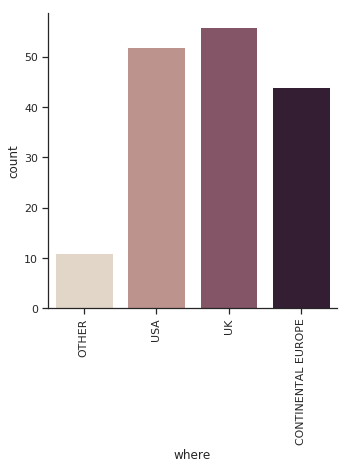

In [46]:
a = sns.catplot(x="where", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

The individuals coming from the UK are highly represented in the dataframe with 54 counts, followed by:
- the individuals from the USA (47 counts);
- the individuals from the continental europe (42 counts);
- the individuals from other countries (9 counts)

1.11) smarthphone_kind

In [47]:
data1['smartphone_kind'].unique()

array([nan, 'Android', 'iOS', 'iphone', 'Android phone and iOS Ipad Air',
       'Android and Ios'], dtype=object)

In [48]:
def smartphone(x):
    if (x == 'iphone') or (x == 'iOS'):
        return 'iOS'
    if (x == 'Android phone and iOS Ipad Air') or (x == 'Android and Ios'):
        return 'Android and iOS'
    if (x == 'Android'):
        return 'Android'
    elif (pd.isnull(x)):
        return 'other'
    
    
data1['smartphone_kind'] = data1['smartphone_kind'].apply(smartphone)
data1['smartphone_kind'].value_counts()

iOS                81
Android            69
other              11
Android and iOS     2
Name: smartphone_kind, dtype: int64

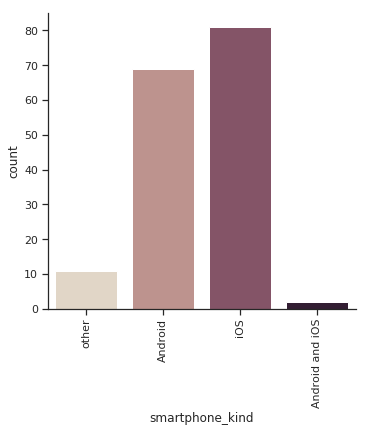

In [49]:
a = sns.catplot(x="smartphone_kind", kind="count", palette="ch:.25", data=data1)
a.set_xticklabels(rotation=90)

NUMERICAL VARIABLES

In [50]:
data1.isnull().sum()

id                              0
gender                          0
position                        0
sector                          0
industry                        0
earning_year                    0
privacy_feelings                0
compensation_share_data         0
value_pers_data                 0
smartphone_kind                 0
age                             0
My position is_norm             1
earning_norm                    0
nr_devices                      0
tot_install_apps                0
nr_install_games                0
nr_purchase_goods_apps          0
nr_pay_sub_apps                 0
nr_banks_apps                   0
nr_social_net_apps              0
nr_installed_payment_systems    0
where                           0
is_student                      0
age_group                       0
dtype: int64

In [51]:
data1.drop([
            'id',
            'sector',
            'My position is_norm',
            'earning_norm',
            'age'
           ],
           axis=1, inplace=True
          )

In [52]:
data1.columns

Index(['gender', 'position', 'industry', 'earning_year', 'privacy_feelings',
       'compensation_share_data', 'value_pers_data', 'smartphone_kind',
       'nr_devices', 'tot_install_apps', 'nr_install_games',
       'nr_purchase_goods_apps', 'nr_pay_sub_apps', 'nr_banks_apps',
       'nr_social_net_apps', 'nr_installed_payment_systems', 'where',
       'is_student', 'age_group'],
      dtype='object')

In [53]:
data1.isnull().sum()

gender                          0
position                        0
industry                        0
earning_year                    0
privacy_feelings                0
compensation_share_data         0
value_pers_data                 0
smartphone_kind                 0
nr_devices                      0
tot_install_apps                0
nr_install_games                0
nr_purchase_goods_apps          0
nr_pay_sub_apps                 0
nr_banks_apps                   0
nr_social_net_apps              0
nr_installed_payment_systems    0
where                           0
is_student                      0
age_group                       0
dtype: int64

In [54]:
data1.to_csv('post_processed2.csv')

In [56]:
data1 = data1[data1['tot_install_apps'] != -1].reset_index()

In [57]:
data1.to_csv('post_processed3.csv')